In [1]:
import requests
import unittest
import re
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
def contains_a_number(text):
    '''Returns true or false if a string has a number'''
    pattern = re.compile(r'(\d)')
    return bool(re.search(pattern, text))


def is_a_postcode(text):
    '''returns true or false if a string is a postcode'''
    upper_text = text.upper()
    
    if contains_a_number(upper_text):
        full_post_code = re.compile(r'^[A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}$')
        partial_post_code = re.compile(r'^[A-Z]{1,2}[A-Z0-9]{1,2}$') 
        return (bool(re.search(full_post_code, upper_text)) or bool(re.search(partial_post_code, upper_text)))
    
    return False
    
    
def replace_postcode_in_sentence(text):
    divided_sentences = text.split()
    
    for word in divided_sentences:
        if contains_a_number(word) and is_a_postcode(word):
            divided_setences.remove(word)
    return divided_sentences.join()


def add_location_to_a_postcode(post_code):
    '''add a location when a postcode is given'''
    url = f'https://api.postcodes.io/postcodes?q={post_code}'
    response = requests.get(url)
    
    if (response.status_code == 200):
        location = response.json()['result'][0]
        if location['admin_county']:
            return location['admin_county']
        else:
             return location['country']
        
    return response.status_code


def remove_special_characters(text):
    '''return a string without special characters except for ' and - '''
    return re.sub(r"[^a-z-A-Z-0-9\-|']", " ", text).strip()


def remove_uk_in_string(text):
    '''remove the word UK from a string and add a white space instead'''
    return (re.sub(r"^(UK) | UK$|UNITED KINGDOM$", " ", remove_special_characters(text).upper())).lower().strip()


def format_string(text):
    '''return a string with the format required'''
    return text.lower().title().strip()


def replace_uk_with_unknown(text):
    '''Replaces UK with unknown'''
    if bool(re.search(r"^UK$|^UNITED KINGDOM$", text.upper())):
        return 'unknown'
    return text


def replace_tildes_with_unknown(text):
    '''Replaces tildes with unknown'''
    if bool(re.search(r"^~~~$", text.upper())):
        return 'unknown'
    return text


def csv_to_data_frame(file_name):  
    """Coverts a csv into a pandas DataFrame"""
    return pd.read_csv(file_name, engine='python')  


def multiple_csv_files_to_data_frame(path):
    '''Creates a data frame from several csv files'''
    files = glob(path)
    files.sort
    return pd.concat((csv_to_data_frame(file) for file in files), ignore_index= True)


def has_uk(text):
    """Returns True or False if UK or United Kingdom are in a text""" 
    location = ['UK','UNITED KINGDOM']
    
    return (text.upper() in location)

    
def replace_postcode_in_sentence(text):
    """Removes a postcode in a sentence"""
    divided_sentences = text.split()
    
    for word in divided_sentences:
        if contains_a_number(word) and is_a_postcode(word):
            divided_sentences.remove(word)
            
    return ' '.join(divided_sentences)



def valid_location(location_to_be_validated,locations):
    """Validates if a location given is in the list given""" 
    
    for location in locations:
        if location in location_to_be_validated:
            return location_to_be_validated
        
    return 'Unknown'



def return_a_location(location_to_be_validated,locations):
    """Returns only the location of a dataset if a location given is in the list given""" 
    
    for location in locations:
        if location in location_to_be_validated:
            return location
        
    return location_to_be_validated


In [3]:
import unittest

class TestIfStringContainsANumber(unittest.TestCase):

    def test_return_true_if_string_contains_a_number(self):
        text = 'HS2 0ST'
        self.assertEqual(contains_a_number(text), True)
    def test_return_false_if_string_does_not_contains_a_number(self):
        text = 'AST'
        self.assertEqual(contains_a_number(text), False)

class TestRemoveSpecialCharacteresFromAString(unittest.TestCase):

    def test_remove_special_characters(self):
        text = 'surrey, UK'
        self.assertEqual(remove_special_characters(text), 'surrey  UK')

    def test_does_not_remove_quotation_marks(self):
        text = "King's Ash"
        self.assertEqual(remove_special_characters(text), "King's Ash")

    def test_does_not_remove_hyphen(self):
        text = "Caister-on-Sea"
        self.assertEqual(remove_special_characters(text), "Caister-on-Sea")
    
class TestFormatString(unittest.TestCase): 
    def test_format_string(self):   
        text = "CaisTer-on-Sea"
        self.assertEqual(format_string(text), "Caister-On-Sea")

class TestIsAPostCode(unittest.TestCase):

    def test_return_true_when_text_is_a_full_postcode(self):
        text = 'HS2 0ST'
        self.assertEqual(is_a_postcode(text), True)

    def test_return_true_when_text_is_a_partial_postcode(self):
        text = 'HS2'
        self.assertEqual(is_a_postcode(text), True)

    def test_return_false_when_text_has_only_numbers(self):
        text = '11'
        self.assertEqual(is_a_postcode(text), False)

    def test_return_false_when_is_not_a_post(self):
        text = 'MARACAY23'
        self.assertEqual(is_a_postcode(text), False)

class TestUKIsRemoveFromASentence(unittest.TestCase):

    def test_remove_uk_from_a_sentence_with_a_special_character(self):
        text = 'surrey,UK'
        self.assertEqual(remove_uk_in_string(text), 'surrey')

    def test_remove_uk_from_a_sentence_with_white_spaces(self):
        text = 'surrey , UK'
        self.assertEqual(remove_uk_in_string(text), 'surrey')
        
    def test_remove_uk_from_a_sentence_when_it_is_at_the_beginning(self):
        text = 'UK gloucester'
        self.assertEqual(remove_uk_in_string(text), 'gloucester')

    def test_return_uk_when_uk_if_not_in_a_sentence (self):
        text = 'uk'
        self.assertEqual(remove_uk_in_string(text), 'uk')

    def test_return_same_string_when_uk_is_in_a_word__1(self):
        text = 'ukra'
        self.assertEqual(remove_uk_in_string(text), 'ukra')

    def test_return_same_string_when_uk_is_in_a_word_2(self):
        text = 'st luke'
        self.assertEqual(remove_uk_in_string(text), 'st luke')
        
class TestUKIsReplaceWithUnknown(unittest.TestCase):

    def test_replace_uk_with_unknown_when_uk_is_not_in_a_sentence(self):
        text = 'UK'
        self.assertEqual(replace_uk_with_unknown(text), 'unknown')
        
    def test_replace_united_kingdom_with_unknown_when_uk_is_not_in_a_sentence(self):
        text = 'United Kingdom'
        self.assertEqual(replace_uk_with_unknown(text), 'unknown')

    def test_return_original_string_if_uk_is_in_a_sentence(self):
        text = 'surrey,UK'
        self.assertEqual(replace_uk_with_unknown(text), 'surrey,UK')
        
    def test_return_original_string_if_united_kingdom_is_in_a_sentence(self):
        text = 'surrey,United Kingdom'
        self.assertEqual(replace_uk_with_unknown(text), 'surrey,United Kingdom')


class TestTildesReplaceWithUnknown(unittest.TestCase):

    def test_replace_tildes_with_unknown_when_tildes_are_not_in_a_sentence(self):
        text = '~~~'
        self.assertEqual(replace_tildes_with_unknown(text), 'unknown')

    def test_return_original_string_if_tildes_are_in_a_sentence(self):
        text = 'surrey,UK~~~'
        self.assertEqual(replace_tildes_with_unknown(text), 'surrey,UK~~~')            
        
class TestRemoveAPostCodeFromSentences(unittest.TestCase):

    def test_return_true_when_text_is_a_full_postcode(self):
        text = 'Devon HS2'
        self.assertEqual(replace_postcode_in_sentence(text), 'Devon')        
       
       
        

unittest.main(argv=[''], verbosity=1, exit=False)


.......................
----------------------------------------------------------------------
Ran 23 tests in 0.008s

OK


In [4]:
#Convert all csv files in the file data into a single data frame 

data = multiple_csv_files_to_data_frame('data/data*')

#Let's check that if has been created 

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.head()

,content,location,date,satisfaction,customer_service,speed,"reliability,"
0,Awful service awful internet speed and reliab...,Manchester~~~,2017-07-06~~~,1,1,1,1
1,Poor customer service. Had to speak to 7 peopl...,Norbury~~~,2017-07-06~~~,2,2,3,3
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells~~~,2017-07-05~~~,1,1,1,1
3,SHOCKING service. Placed order got told it wi...,Morpeth~~~,2017-07-04~~~,1,1,1,1
4,Very unhappy with connection quality and custo...,Norfolk~~~,2017-07-04~~~,1,1,1,1


In [6]:
#Amount of columns and rows

print(data.shape)


(3192, 7)


In [7]:
data.describe()


,content,location,date,satisfaction,customer_service,speed,"reliability,"
count,3192,3192,3192,3192,3192,3192,3192
unique,3176,1581,1827,11,11,11,11
top,~~~,London~~~,2016-02-29~~~,1,1,1,1
freq,3,256,9,2257,2177,1729,1821


In [8]:
# Let's select the location column to check the unique values and see the kind of data that we have in it 

unique_locations = data['location'].dropna().unique()
print('The amount of unique locations is :',len(unique_locations))

# for i in unique_locations:
#     print(i)


The amount of unique locations is : 1581


### As you can see we have a mix of locations values, so we will start the cleaning by first creating a new column called 'formated_location' where we will save all the changes applied so we can compare with the original column.

In [9]:
# Create a new column called formated_location where we will apply all the functions described above to the locations. 

data['formated_location'] = data['location']


#Review the first 5 rows to check that the new column was added

data.head()


,content,location,date,satisfaction,customer_service,speed,"reliability,",formated_location
0,Awful service awful internet speed and reliab...,Manchester~~~,2017-07-06~~~,1,1,1,1,Manchester~~~
1,Poor customer service. Had to speak to 7 peopl...,Norbury~~~,2017-07-06~~~,2,2,3,3,Norbury~~~
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells~~~,2017-07-05~~~,1,1,1,1,Tenbury Wells~~~
3,SHOCKING service. Placed order got told it wi...,Morpeth~~~,2017-07-04~~~,1,1,1,1,Morpeth~~~
4,Very unhappy with connection quality and custo...,Norfolk~~~,2017-07-04~~~,1,1,1,1,Norfolk~~~


### As we will be working with the locations we only need to see both location columns.

In [10]:
#We will be using the location_columns variable check changes during all the cleaning stage

location_columns = ['location','formated_location']

data[location_columns].head(10)

,location,formated_location
0,Manchester~~~,Manchester~~~
1,Norbury~~~,Norbury~~~
2,Tenbury Wells~~~,Tenbury Wells~~~
3,Morpeth~~~,Morpeth~~~
4,Norfolk~~~,Norfolk~~~
5,Norfolk~~~,Norfolk~~~
6,Ss94nq~~~,Ss94nq~~~
7,LONDON~~~,LONDON~~~
8,Newcastle~~~,Newcastle~~~
9,London~~~,London~~~


In [11]:
#Let's check the amount of locations that have special characters including spaces and tildes

locations_with_special_characters=data[data['formated_location'].str.contains("\W", regex=True)]

print('The amount of locations with special characters is :', len(locations_with_special_characters[location_columns]))



The amount of locations with special characters is : 3192


### From this we can deduce that all the rows contain special characters

In [12]:
print(data[location_columns].head())

           location formated_location
0     Manchester~~~     Manchester~~~
1        Norbury~~~        Norbury~~~
2  Tenbury Wells~~~  Tenbury Wells~~~
3        Morpeth~~~        Morpeth~~~
4        Norfolk~~~        Norfolk~~~


In [13]:
locations_with_only_tildes = data[data['location'] == '~~~']

print('The amount of locations with only tildes is: ', len(locations_with_only_tildes))
                                                                       

The amount of locations with only tildes is:  58


In [14]:
#Let's replace the tildes for unknown

data['formated_location'] = data['formated_location'].map(lambda x : replace_tildes_with_unknown(x))

#Let's check the changes:

locations_with_only_tildes[location_columns].head()

,location,formated_location
21,~~~,~~~
92,~~~,~~~
189,~~~,~~~
324,~~~,~~~
374,~~~,~~~


In [15]:
#Let's remove special characteres but avoiding the ones that belong to real locations, 
#Let's use the function remove_special_characters

data['formated_location'] = data['formated_location'].apply(lambda x : remove_special_characters(x))

#Check the changes 

data[location_columns].head()


,location,formated_location
0,Manchester~~~,Manchester
1,Norbury~~~,Norbury
2,Tenbury Wells~~~,Tenbury Wells
3,Morpeth~~~,Morpeth
4,Norfolk~~~,Norfolk


In [16]:
#Let's check if we have locations with only uk or united kingdom  

uk_values = data[data['formated_location'].apply(lambda x : has_uk(x))]

print(uk_values[location_columns])

                location formated_location
18                 UK~~~                UK
53                 Uk~~~                Uk
80                 uk~~~                uk
132                UK~~~                UK
146                UK~~~                UK
179                UK~~~                UK
310                UK~~~                UK
380    United Kingdom~~~    United Kingdom
400                uk~~~                uk
1149               Uk~~~                Uk
1207   United Kingdom~~~    United Kingdom
1233   United Kingdom~~~    United Kingdom
1323               UK~~~                UK
1364   United Kingdom~~~    United Kingdom
1524   United Kingdom~~~    United Kingdom
1596               Uk~~~                Uk
1675   United Kingdom~~~    United Kingdom
1708   United Kingdom~~~    United Kingdom
1728   United Kingdom~~~    United Kingdom
1926               UK~~~                UK
1993               UK~~~                UK
2096   United Kingdom~~~    United Kingdom
2106   Unit

### As we can see there are several locations with either United Kingdom and UK on them so let's replace them with unknown as this value (UK or United Kingdom ) is not specific enough. 

In [17]:
#Let's start by changing the all the values that only contains 'UK' or 'United Kingdom' to unknown
# using the function replace_uk_with_unknown

data['formated_location'] = data['formated_location'].apply(lambda x: replace_uk_with_unknown(x)) 

#Check the changes 

uk_replaced= data[data['formated_location'] == 'unknown']

uk_replaced[location_columns]


,location,formated_location
18,UK~~~,unknown
21,~~~,unknown
53,Uk~~~,unknown
80,uk~~~,unknown
92,~~~,unknown
...,...,...
3135,Uk ~~~,unknown
3151,~~~,unknown
3158,~~~,unknown
3168,Uk~~~,unknown


### As we can see now the rows with UK or United Kingdom values in the formated_location column have been changed to unknown 

In [18]:
#Lets now replace the rows where UK is in a sentence using remove_uk_in_string

data['formated_location'] = data['formated_location'].apply(lambda x: remove_uk_in_string(x) ) 

#Check changes


uk_in_sentences = data[data['location'].str.contains("UK| UK|United Kingdom|Uk|uK|U K|united kingdom", na=False)]


uk_in_sentences[location_columns]


,location,formated_location
18,UK~~~,unknown
53,Uk~~~,unknown
103,London UK~~~,london
132,UK~~~,unknown
146,UK~~~,unknown
...,...,...
2994,UK~~~,unknown
2997,Birmingham United Kingdom ~~~,birmingham
3135,Uk ~~~,unknown
3168,Uk~~~,unknown


In [19]:
# Let's now identify the location that have numbers:

locations_with_numbers=data[data['location'].str.contains("\d", na=False, regex=True)]

locations_with_numbers[location_columns]

,location,formated_location
6,Ss94nq~~~,ss94nq
19,ha8 9ed~~~,ha8 9ed
71,Bs15 4pf~~~,bs15 4pf
204,ct10 3ng~~~,ct10 3ng
229,ch88ad~~~,ch88ad
270,ig89~~~,ig89
403,E7~~~,e7
408,WR6~~~,wr6
413,PE32 1JJ~~~,pe32 1jj
443,SW20 London~~~,sw20 london


In [20]:
#Let's assign a location when we have only postcodes:
data['formated_location'] = data['formated_location'].apply(lambda x: add_location_to_a_postcode(x) if(is_a_postcode(x)) else x ) 

# Let's check the changes

locations_with_numbers=data[data['location'].str.contains("\d", na=False, regex=True)]

locations_with_numbers[location_columns]

,location,formated_location
6,Ss94nq~~~,England
19,ha8 9ed~~~,England
71,Bs15 4pf~~~,England
204,ct10 3ng~~~,Kent
229,ch88ad~~~,Wales
270,ig89~~~,England
403,E7~~~,England
408,WR6~~~,England
413,PE32 1JJ~~~,Norfolk
443,SW20 London~~~,sw20 london


In [21]:
#Let's apply lowercase and title for all the locations
data['formated_location'] = data['formated_location'].apply(lambda x : format_string(x)) 

In [22]:
#Let's check the remaining locations with numbers
remaining_locations_with_numbers=data[data['formated_location'].str.contains("\d", na=False, regex=True)]

remaining_locations_with_numbers[location_columns]

,location,formated_location
443,SW20 London~~~,Sw20 London
588,Ipswich IP8~~~,Ipswich Ip8
920,Belfast BT8 8DA~~~,Belfast Bt8 8Da
1295,"London, w8~~~",London W8
1552,Worcester B975XJ~~~,Worcester B975Xj
1746,30 miles from central london~~~,30 Miles From Central London
1848,London W2~~~,London W2
2235,London NW9~~~,London Nw9
2254,London SW9~~~,London Sw9
2364,Wrexham1~~~,Wrexham1


In [23]:
#Let's apply lowercase and title for all the locations
data['formated_location'] = data['formated_location'].apply(lambda x : replace_postcode_in_sentence(x)) 

remaining_locations_with_numbers2=data[data['location'].str.contains("\d", na=False, regex=True)]

remaining_locations_with_numbers2[location_columns]



,location,formated_location
6,Ss94nq~~~,England
19,ha8 9ed~~~,England
71,Bs15 4pf~~~,England
204,ct10 3ng~~~,Kent
229,ch88ad~~~,Wales
270,ig89~~~,England
403,E7~~~,England
408,WR6~~~,England
413,PE32 1JJ~~~,Norfolk
443,SW20 London~~~,London


In [24]:

#Use a combined data set from different sources to get the location in UK
data_uk_locations = csv_to_data_frame("uk_locations.csv")
uk_locations= data_uk_locations['Name']

In [25]:
#Let's validate the locations that we have this will help us the remove not valide locations from the list
data['formated_location'] = data['formated_location'].apply(lambda x: valid_location(x,uk_locations)) 


In [26]:

#Use a data set from https://simplemaps.com/data/gb-cities to get the cities
data_uk_cities = csv_to_data_frame("gb.csv")
uk_cities= data_uk_cities['city']

In [27]:
#Let's just leave the cities when a long location was given 
data['formated_location'] = data['formated_location'].apply(lambda x: return_a_location(x,uk_cities)) 

In [28]:
# Let's select the 'formated_location' column to check the unique values
     
unique_locations = data['formated_location'].unique()
print('There are: ',len(unique_locations), 'unique locations')





There are:  777 unique locations


In [29]:
# Let's count the 20 first locations with reviews from the 'formated_location'
data['formated_location'].value_counts()[:10]


London        368
Unknown       353
Manchester     60
York           48
Derby          35
Bristol        35
England        34
Glasgow        32
Birmingham     30
Kent           30
Name: formated_location, dtype: int64

<AxesSubplot:>

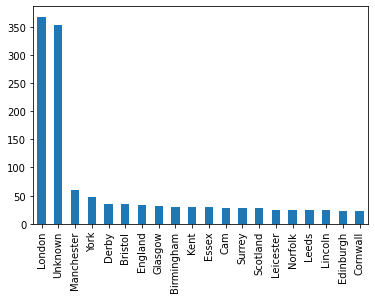

In [30]:
# Let's see the 20 first values in graph 

data['formated_location'].value_counts()[:20].plot(kind='bar')

### As you can see the location with mores reviews is London with 368 folow by  Machester with 60 and York with 48. We have 353 Unknown locations due to the cleaning process were we were unable to identified where these reviews come from